In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
path = os.getcwd()
print(path)

D:\College\Semester 5\Subjects\Machine Learning\Competitions\comp1


In [3]:
# import data
train = pd.read_csv(path+'/train.csv')
test = pd.read_csv(path+'/test.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13375 entries, 0 to 13374
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               13375 non-null  int64  
 1   index            13375 non-null  int64  
 2   Name             13373 non-null  object 
 3   Platform         13375 non-null  object 
 4   Year_of_Release  13150 non-null  float64
 5   Genre            13373 non-null  object 
 6   Publisher        13328 non-null  object 
 7   NA_Sales         13375 non-null  float64
 8   EU_Sales         13375 non-null  float64
 9   JP_Sales         13375 non-null  float64
 10  Other_Sales      13375 non-null  float64
 11  Global_Sales     13375 non-null  float64
 12  Critic_Score     6505 non-null   float64
 13  Critic_Count     6505 non-null   float64
 14  User_Score       8007 non-null   object 
 15  User_Count       6039 non-null   float64
 16  Developer        8067 non-null   object 
 17  Rating      

<ipython-input-5-b6ff991741c4>:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


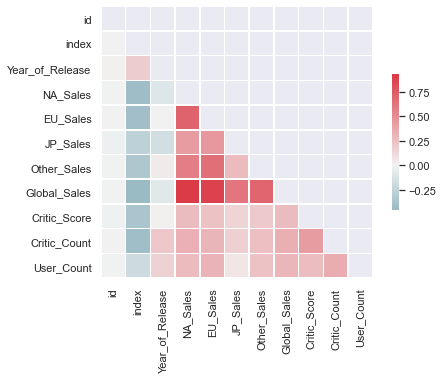

In [5]:
import seaborn as sns
# Correlation Matrix
# Set the style of the visualization
sns.set(style="dark")

# Create a covariance matrix
corr = train.corr()

# Generate a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (7,5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5});

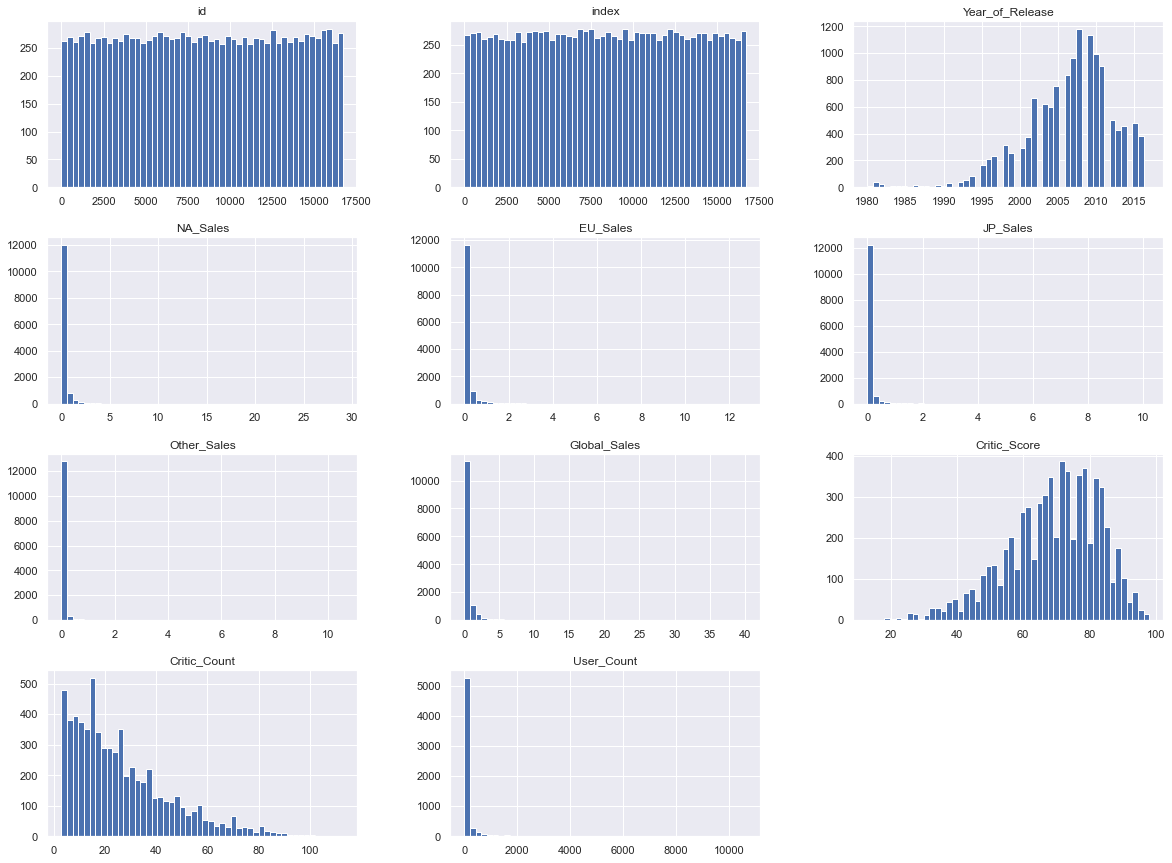

In [6]:
train.hist(bins = 50, figsize = (20,15))
plt.show()

Number of unique values: 30


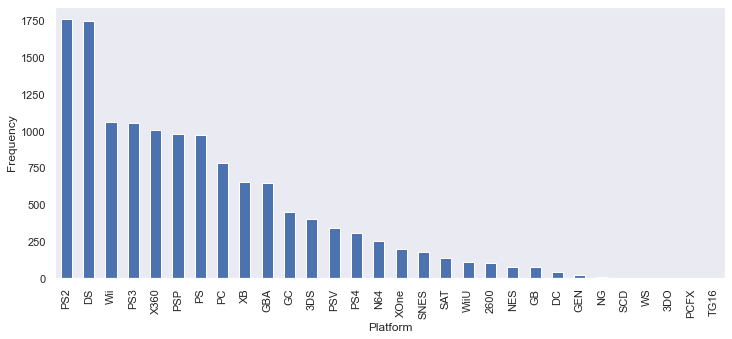

In [7]:
# Plot of value counts for each Platform
print("Number of unique values:", train.Platform.nunique())
train.Platform.value_counts().plot(kind='bar', figsize=(12,5))
plt.xlabel('Platform')
plt.ylabel('Frequency');

Number of unique values: 12


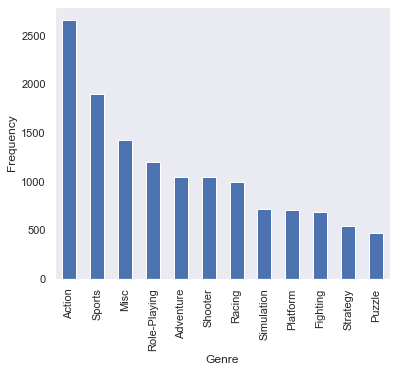

In [8]:
# Plot of value counts for each Genre
print("Number of unique values:", train.Genre.nunique())
train.Genre.value_counts().plot(kind='bar', figsize=(6,5))
plt.xlabel('Genre')
plt.ylabel('Frequency');

Number of unique values: 540


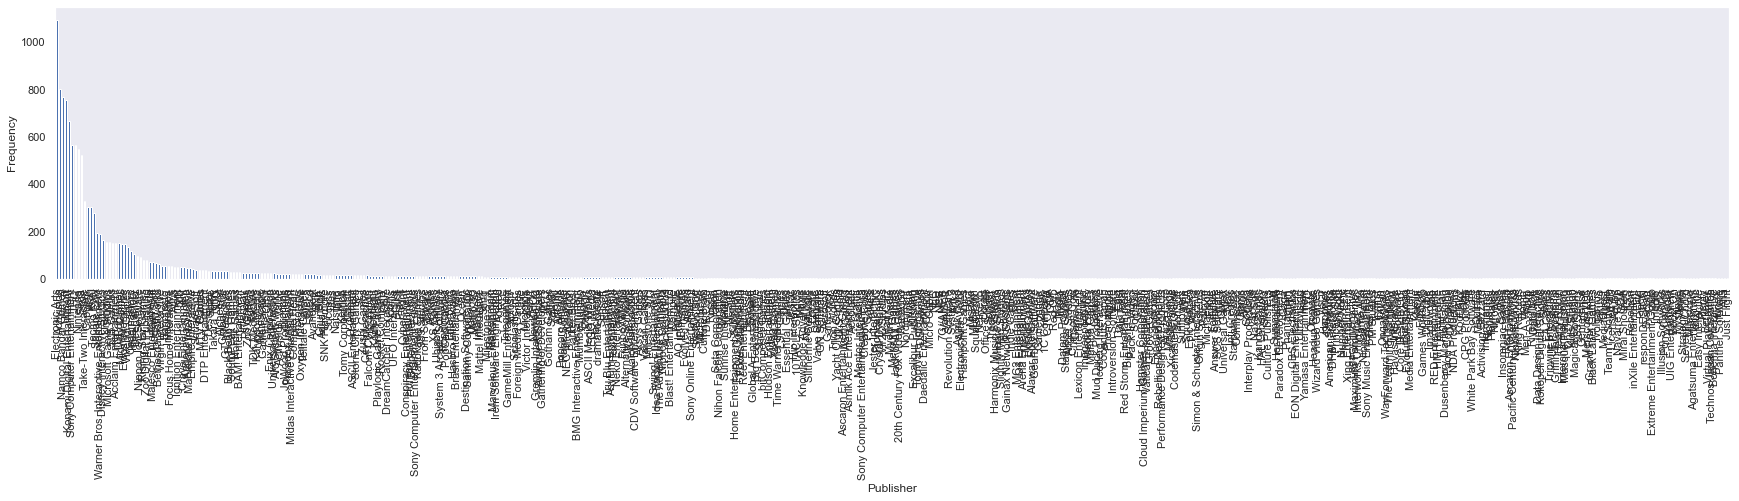

In [9]:
# Plot of value counts for each Publisher
print("Number of unique values:", train.Publisher.nunique())
train.Publisher.value_counts().plot(kind='bar', figsize=(30,5))
plt.xlabel('Publisher')
plt.ylabel('Frequency');

Text(0, 0.5, 'Numeric Parameters')

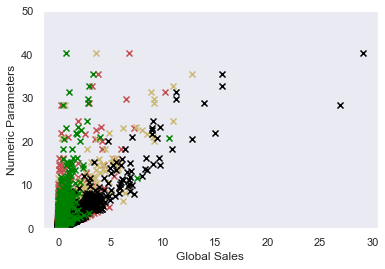

In [10]:
plt.scatter(train['JP_Sales'],train['Global_Sales'],marker="x",color="r")
plt.scatter(train['EU_Sales'],train['Global_Sales'],marker="x",color="y")
plt.scatter(train['NA_Sales'],train['Global_Sales'],marker="x",color="black")
plt.scatter(train['Other_Sales'],train['Global_Sales'],marker="x",color="green")
plt.xlabel("Global Sales")
plt.ylim(0,50)
plt.ylabel("Numeric Parameters")

# Linear Regression

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

final_features = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
X = train[final_features]
y = train.Global_Sales 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Predicting y values
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

# Calculating MAE

train_mse = mean_absolute_error(y_train,y_hat_train)
test_mse = mean_absolute_error(y_test,y_hat_test)
print("Train MAE:", train_mse)
print("Test MAE:", test_mse)

Train MAE: 0.0028560519375005304
Test MAE: 0.0029380935798754256


(0.0, 50.0)

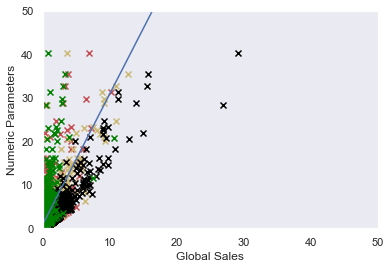

In [12]:
theta=linreg.coef_
plt.scatter(train['JP_Sales'],train['Global_Sales'],marker="x",color="r")
plt.scatter(train['EU_Sales'],train['Global_Sales'],marker="x",color="y")
plt.scatter(train['NA_Sales'],train['Global_Sales'],marker="x",color="black")
plt.scatter(train['Other_Sales'],train['Global_Sales'],marker="x",color="green")
plt.xlabel("Global Sales")
plt.ylabel("Numeric Parameters")
x_value=[x for x in range(0,40)]
y_value=[y*theta[3]+y*theta[2]+y*theta[1]+theta[0] for y in x_value]
plt.plot(x_value,y_value,color="b")
plt.ylim(0,50)
plt.xlim(0,50)

# Ridge

In [13]:
final_features = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
X = train[final_features]
y = train.Global_Sales 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

r_reg = Ridge(alpha = 0.00001)
r_reg.fit(X_train, y_train)

# Predicting y values
y_hat_train = r_reg.predict(X_train)
y_hat_test = r_reg.predict(X_test)

# Calculating MAE

train_mse = mean_absolute_error(y_train,y_hat_train)
test_mse = mean_absolute_error(y_test,y_hat_test)
print("Train MAE:", train_mse)
print("Test MAE:", test_mse)

Train MAE: 0.002856052474367364
Test MAE: 0.0029380943798475116


(0.0, 50.0)

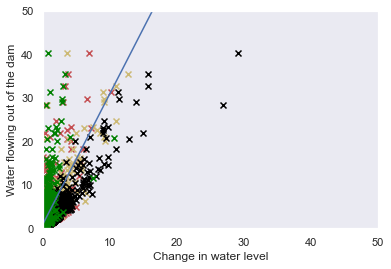

In [14]:
theta=r_reg.coef_
plt.scatter(train['JP_Sales'],train['Global_Sales'],marker="x",color="r")
plt.scatter(train['EU_Sales'],train['Global_Sales'],marker="x",color="y")
plt.scatter(train['NA_Sales'],train['Global_Sales'],marker="x",color="black")
plt.scatter(train['Other_Sales'],train['Global_Sales'],marker="x",color="green")
plt.xlabel("Change in water level")
plt.ylabel("Water flowing out of the dam")
x_value=[x for x in range(0,40)]
y_value=[y*theta[3]+y*theta[2]+y*theta[1]+theta[0] for y in x_value]
plt.plot(x_value,y_value,color="b")
plt.ylim(0,50)
plt.xlim(0,50)

In [16]:
test_sub = pd.read_csv(path+'/test.csv')
test_sub = test_sub.drop(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher','NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'], axis=1)
pred = linreg.predict(test[final_features])
test_sub['Global_Sales'] = pred
test_sub.head()

,id,Global_Sales
0,11,0.250222
1,12,0.340204
2,17,0.830196
3,23,0.090238
4,27,0.160226


In [17]:
test_sub.to_csv('submission.csv', index=False)